# Traveling Salesman Problem (TSP)
## The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in theoretical computer science and operations research.
***
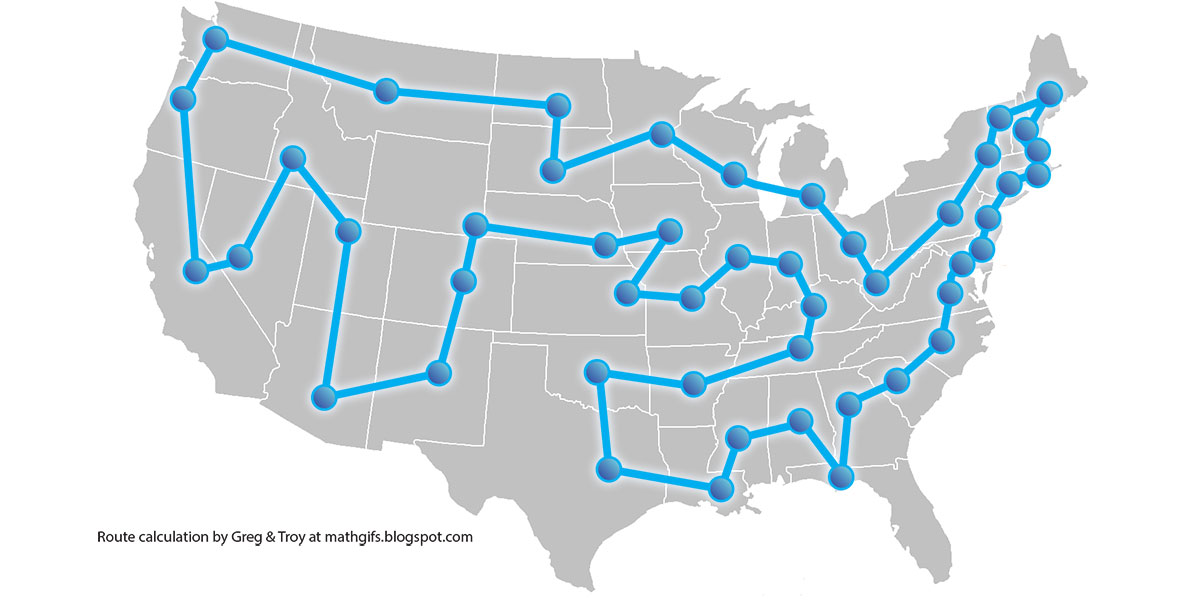


### Pratical Example:
UPS ORION https://www.youtube.com/watch?v=CsJRsToDI8w
***

## Mathematicians began to try to abstract this problem and design different algorithms to solve this classic mathematical problem. It is a common practice to use a string of numbers to represent the order in which each city is visited. Some people call each of the solution a chromosome.
## The number zero represents the starting point and the end point.
## Each other number represents each city or customer location that needs to be visited.
## By calculating the total distance of each solution, the quality of each solution can be compared.
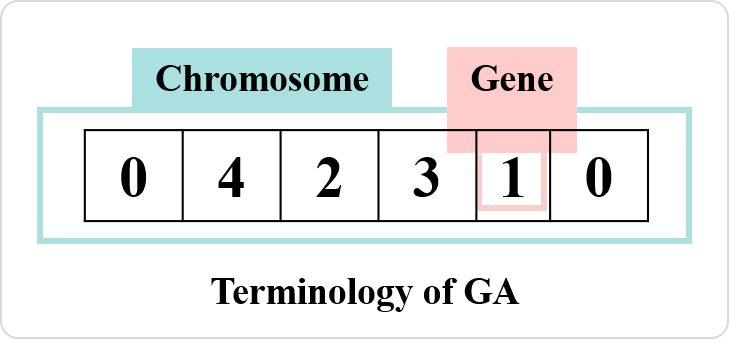

## Step1: Problem Setup Function

In [29]:
# impot madules and setup parameters
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=10

In [25]:
#Setup the random locations of all customers and draw the picture

def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x,y=[0],[0] #put deport (start point) at the middle of service area
   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')    


[0, -1267, 36, 318, 4083, -2530, -4532, 1721, 4912, 1930, -2394] [0, 4853, 1743, 3651, 1710, -240, -1547, -287, 849, -2480, -803]


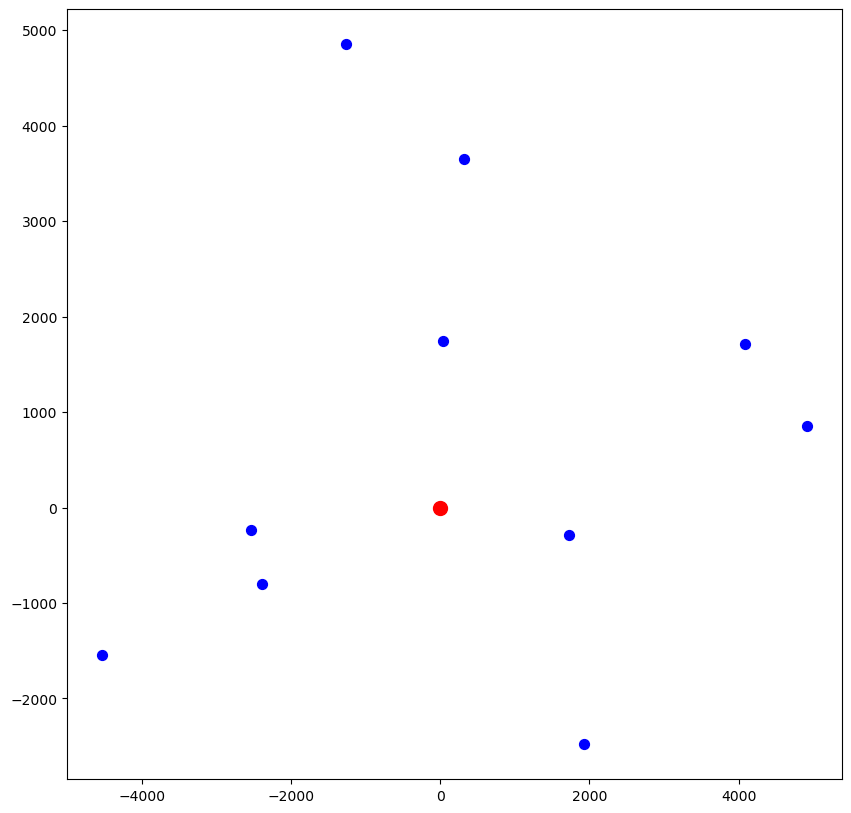

In [31]:
# Test
x,y=setup()
show (x,y)
print(x,y)

## Step 2: Visualize Route Function

In [32]:
#function for visualizing route
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray")         
    plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


TypeError: visualize() missing 1 required positional argument: 'color'

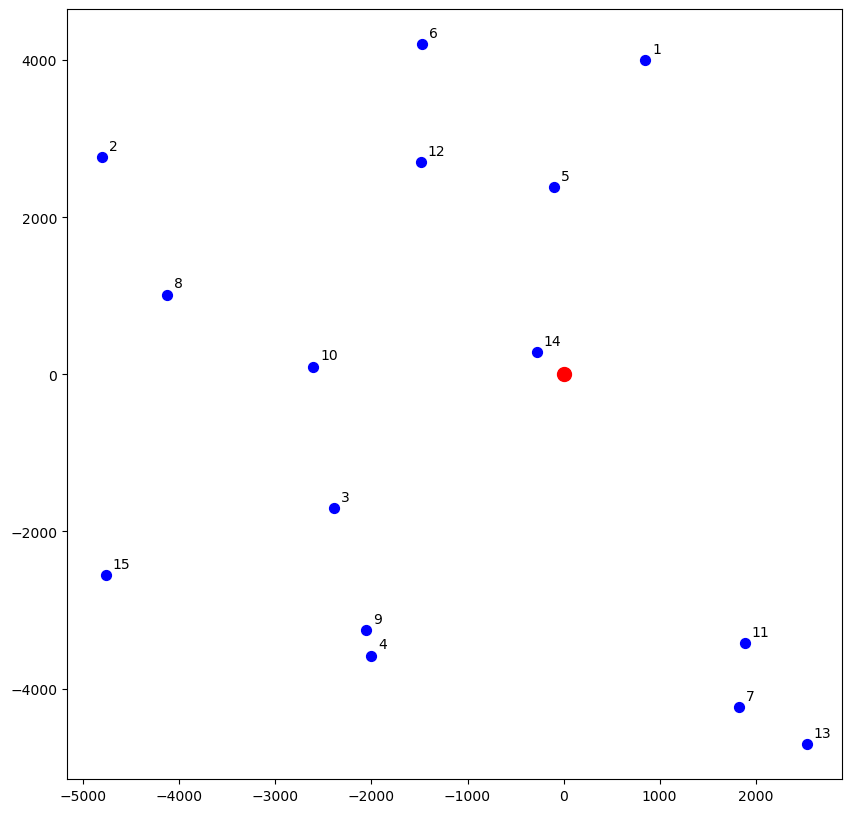

In [87]:
#Test with a randomly decided route
x,y=setup()
show (x,y)
route=[x for x in range(1,number_of_customers+1)]
print(route)
rd.shuffle(route)
route.insert(0,0)
route.append(0)
visualize(route)
print(route)

## Step 3:Objective Function

In [45]:
#The Objective function which calculats the Manhattan distance of the inputted route
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
#         print(route[i],"->", route[i+1],"distance:",abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]]))
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

In [46]:
#Test
print(objective(route))
print(x,y)

66010
[0, -1267, 36, 318, 4083, -2530, -4532, 1721, 4912, 1930, -2394] [0, 4853, 1743, 3651, 1710, -240, -1547, -287, 849, -2480, -803]


## Step 4:Greedy Algorithm

In [86]:
def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
        print(result)
    return(result)

[0, 1, 0]
[0, 2, 1, 0]
[0, 2, 3, 1, 0]
[0, 2, 4, 3, 1, 0]
[0, 2, 4, 3, 1, 5, 0]
[0, 2, 6, 4, 3, 1, 5, 0]
[0, 2, 7, 6, 4, 3, 1, 5, 0]
[0, 2, 7, 6, 4, 8, 3, 1, 5, 0]
[0, 2, 7, 6, 4, 9, 8, 3, 1, 5, 0]
[0, 2, 7, 10, 6, 4, 9, 8, 3, 1, 5, 0]
[0, 2, 7, 10, 6, 4, 9, 8, 3, 1, 5, 0] 36444


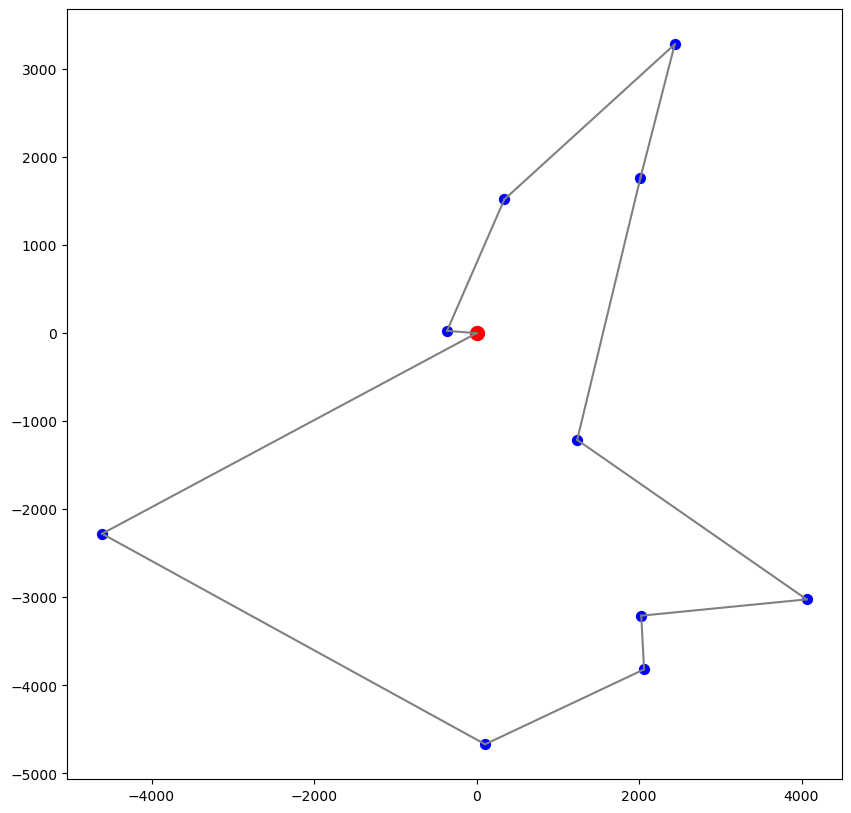

In [49]:
#Test
result=greedy()
print(result, objective(result))
visualize (result)

# Greedy Algorithm for TSP (finished version)

Total Dist :  103774


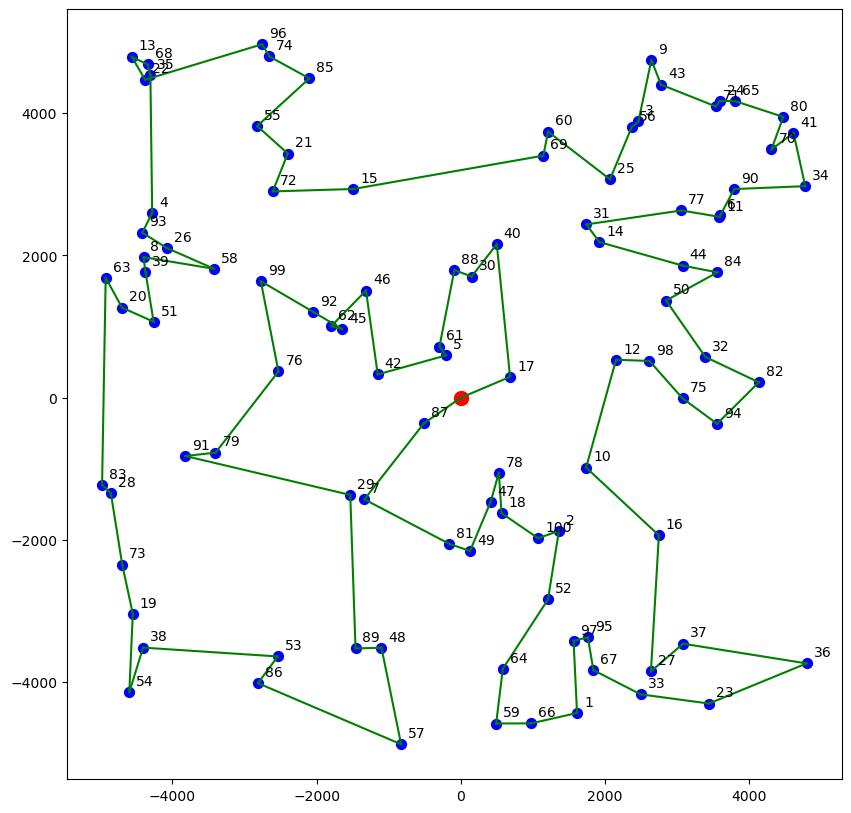

In [92]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=100

colors = ['g','c','m','y','gray','orange']
# colors = []

# for i in range(100):
#     colors.append('#%06X' % rd.randint(0, 0xFFFFFF))
    
    
def setup ():
    plt.rcParams["figure.figsize"] = (10,10)
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')
        plt.annotate(i, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
        
def visualize (route,color):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],color)         
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        #print(route[i],"->", route[i+1],"distance:",abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]]))
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=999999999
        for j in range(1,len(result)):
            temp=result.copy()
            #print("this is temp route: ",temp)
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
        #print ("result is ",result)
    #print(result)
    return(result)



x,y=setup()
result=greedy()
print("Total Dist : ",objective(result))
visualize(result,colors[0])


# <font color=red>In-Class Exercise (100 points)</font>
# If using more than 1 trucks to delivery packages to customers, how would you modify the greedy algorithm? 

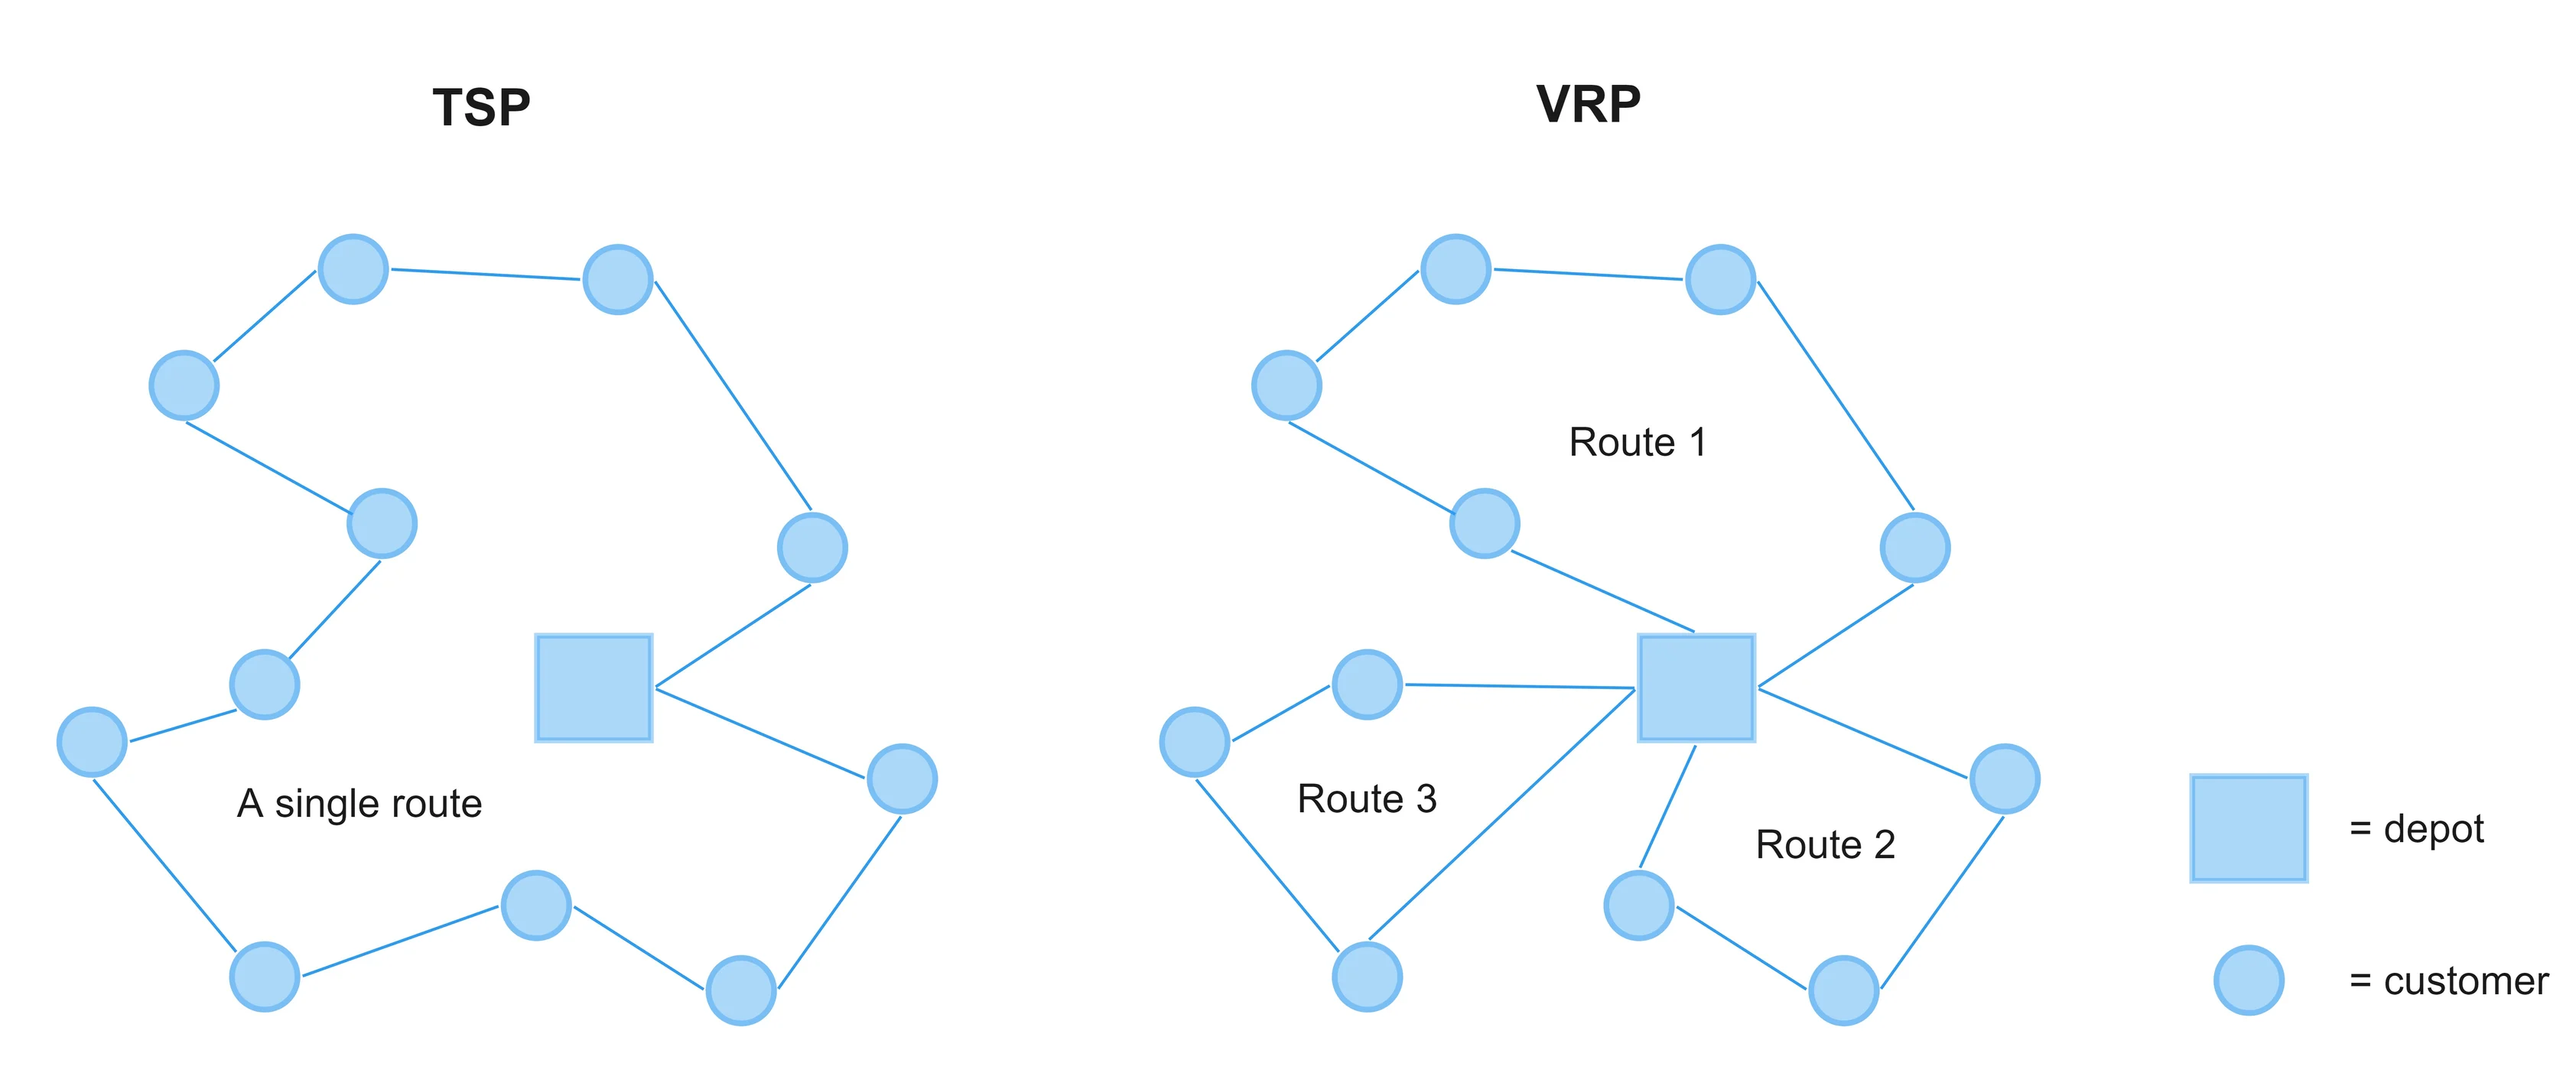


routes :  [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0]] 

Route 1: [0, 17, 100, 52, 97, 95, 67, 27, 37, 36, 23, 33, 1, 66, 59, 57, 81, 49, 18, 47, 29, 0]
Route 2: [0, 7, 48, 89, 53, 38, 54, 19, 86, 64, 2, 16, 10, 12, 0]
Route 3: [0, 61, 30, 31, 25, 90, 34, 41, 70, 80, 65, 24, 71, 43, 9, 3, 56, 77, 50, 98, 32, 82, 94, 75, 78, 0]
Route 4: [0, 79, 91, 73, 28, 83, 20, 63, 39, 8, 93, 13, 68, 22, 35, 4, 26, 58, 51, 99, 76, 0]
Route 5: [0, 88, 40, 14, 44, 84, 11, 6, 69, 60, 85, 74, 96, 55, 21, 72, 15, 46, 92, 62, 45, 42, 5, 87, 0]


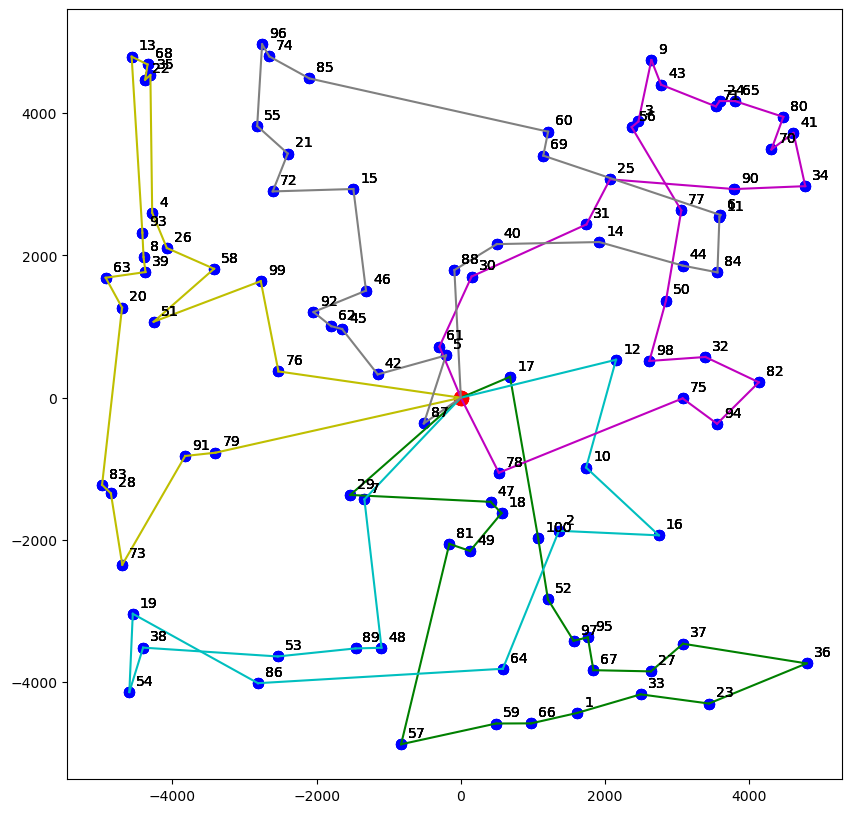

In [94]:
def multitruck(num_trucks):
    # Initialize routes with depot [0, 0]
    routes = [[0,0] for _ in range(num_trucks)]
    print("routes : ",routes,'\n')
    
    for i in range(1,number_of_customers + 1):
        #initiate var
        best_truck, best_pos = None, None
        min_cost = float('inf')
        #loop each truck
        for truck, route in enumerate(routes):
#             print("truck is:",truck+1,", route is:",route)
            for pos in range(1,len(route)):
                temp_route = route.copy()
                temp_route.insert(pos, i)
#                 print("pos is",pos,"customer is",i)
                cost = objective(temp_route)
                #compare minimum
                if cost < min_cost:
                    min_cost = cost
                    best_truck, best_pos = truck, pos
        routes[best_truck].insert(best_pos, i)
        #print(routes)
    return routes
                

# Call
num_trucks = 5
result_routes = multitruck(num_trucks) 

#print("result routes are : ",result_routes)

# Visualize the routes
for i, route in enumerate(result_routes):
    print(f"Route {i + 1}: {route}")
#     print("Total Dist",i+1,"=",objective(route),'\n')
    visualize(route,colors[i])
plt.show()